<a href="https://colab.research.google.com/github/filipecarbonera/case_appmax/blob/main/Case_AppMax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# Importando as bibliotecas necessárias para a análise.
import pandas as pd

# **Tabela:** Base

In [19]:
# Buscando e apresentando o primeiro dataframe a ser trabalhado.
base = pd.read_csv('/content/base.csv')
base

,order_id,value,status,freight_type,freight_value,payment_type,paid_at,refunded_at,device,company_id,customer_id,product_id
0,1001,156.99,aprovado,CHINAPOST,12.71,Boleto,2021-03-02 08:39:09,NaN,DESKTOP,197.0,11238,2386
1,1002,149.98,aprovado,PAC,0.00,CreditCard,2021-03-01 00:00:12,NaN,DESKTOP,87.0,11239,1604
2,1003,169.80,aprovado,SEDEX,0.00,CreditCard,2021-03-01 00:00:11,NaN,DESKTOP,212.0,11226,2108
3,1004,191.71,nao_autorizado,JADLOG,0.00,CreditCard,NaN,NaN,DESKTOP,356.0,11240,2736
4,1005,57.80,aprovado,SEDEX,0.00,CreditCard,2021-03-01 00:00:40,NaN,DESKTOP,89.0,11241,883
...,...,...,...,...,...,...,...,...,...,...,...,...
19434,17811,508.00,pendente,SEDEX,0.00,Boleto,NaN,NaN,DESKTOP,214.0,24012,1387
19435,17812,329.51,aprovado,SEDEX,0.00,CreditCard,2021-03-01 23:59:17,NaN,DESKTOP,318.0,24013,2016
19436,17813,139.90,aprovado,PAC,0.00,CreditCard,2021-03-01 23:59:19,NaN,DESKTOP,319.0,24014,1901
19437,17814,105.63,aprovado,PAC,0.00,CreditCard,2021-03-01 23:59:29,NaN,DESKTOP,321.0,24015,2557


Observações e Suposições:
- Cada linha é uma ordem de compra com suas respectivas informação vinculadas.
- É possível ver dados nulos na data de pagamento, como se trata do único dado "data", os registros com essa coluna nula serão eliminados por se tratar de algum erro no registro.
- Também irei verificar se há linhas duplicadas.
- Como as colunas company_id e customer_id não fazem referência a nenhum valor real vinculado, vou retira-las na análise.

In [20]:
# Removendo as colunas company_id e customer_id.
base = base.drop(columns=['company_id'])
base = base.drop(columns=['customer_id'])
base.head()

,order_id,value,status,freight_type,freight_value,payment_type,paid_at,refunded_at,device,product_id
0,1001,156.99,aprovado,CHINAPOST,12.71,Boleto,2021-03-02 08:39:09,NaN,DESKTOP,2386
1,1002,149.98,aprovado,PAC,0.00,CreditCard,2021-03-01 00:00:12,NaN,DESKTOP,1604
2,1003,169.80,aprovado,SEDEX,0.00,CreditCard,2021-03-01 00:00:11,NaN,DESKTOP,2108
3,1004,191.71,nao_autorizado,JADLOG,0.00,CreditCard,NaN,NaN,DESKTOP,2736
4,1005,57.80,aprovado,SEDEX,0.00,CreditCard,2021-03-01 00:00:40,NaN,DESKTOP,883


In [21]:
# Verificando sem os 'paid_at' nulos se tratam de pagamentos não realizados.
base[['paid_at','status']]

,paid_at,status
0,2021-03-02 08:39:09,aprovado
1,2021-03-01 00:00:12,aprovado
2,2021-03-01 00:00:11,aprovado
3,NaN,nao_autorizado
4,2021-03-01 00:00:40,aprovado
...,...,...
19434,NaN,pendente
19435,2021-03-01 23:59:17,aprovado
19436,2021-03-01 23:59:19,aprovado
19437,2021-03-01 23:59:29,aprovado


Conforme a suposição, os status pendentes e não aprovados não tem data de pagamento, o que impede de retirar as linhas sem data de pagamento da análise.

In [22]:
# Verifico aqui os tipos de dados que estou trabalhando.
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       19439 non-null  int64  
 1   value          19439 non-null  float64
 2   status         19439 non-null  object 
 3   freight_type   19439 non-null  object 
 4   freight_value  19439 non-null  float64
 5   payment_type   18589 non-null  object 
 6   paid_at        10638 non-null  object 
 7   refunded_at    1039 non-null   object 
 8   device         19439 non-null  object 
 9   product_id     19439 non-null  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 1.5+ MB


Os tipos de dados parecem fazer sentido. Os Ids como int's, os valores monetários como floats e os demais como objects.

In [23]:
# Verificando algumas métricas para as colunas numéricas.
base.describe()

,order_id,value,freight_value,product_id
count,19439.000000,19439.000000,19439.000000,19439.000000
mean,9389.858532,197.948658,6.600931,1838.733783
std,4823.898910,237.945234,15.864106,930.711908
min,1001.000000,0.000000,0.000000,250.000000
25%,5244.500000,97.900000,0.000000,1086.000000
50%,9387.000000,147.900000,0.000000,1923.000000
75%,13487.000000,219.320000,0.000000,2584.000000
max,17815.000000,4499.700000,198.610000,3910.000000


Aqui apenas faz sentido analisar o value e o fright_value. Observo então que o valor mínimo da coluna value é zero. Como não faz sentido haver uma ordem de compra com valor zero vou retirá-las da análise.

In [24]:
# Removendo linhas duplicadas.
base = base.drop_duplicates()
base

,order_id,value,status,freight_type,freight_value,payment_type,paid_at,refunded_at,device,product_id
0,1001,156.99,aprovado,CHINAPOST,12.71,Boleto,2021-03-02 08:39:09,NaN,DESKTOP,2386
1,1002,149.98,aprovado,PAC,0.00,CreditCard,2021-03-01 00:00:12,NaN,DESKTOP,1604
2,1003,169.80,aprovado,SEDEX,0.00,CreditCard,2021-03-01 00:00:11,NaN,DESKTOP,2108
3,1004,191.71,nao_autorizado,JADLOG,0.00,CreditCard,NaN,NaN,DESKTOP,2736
4,1005,57.80,aprovado,SEDEX,0.00,CreditCard,2021-03-01 00:00:40,NaN,DESKTOP,883
...,...,...,...,...,...,...,...,...,...,...
19434,17811,508.00,pendente,SEDEX,0.00,Boleto,NaN,NaN,DESKTOP,1387
19435,17812,329.51,aprovado,SEDEX,0.00,CreditCard,2021-03-01 23:59:17,NaN,DESKTOP,2016
19436,17813,139.90,aprovado,PAC,0.00,CreditCard,2021-03-01 23:59:19,NaN,DESKTOP,1901
19437,17814,105.63,aprovado,PAC,0.00,CreditCard,2021-03-01 23:59:29,NaN,DESKTOP,2557


Confirmo o funcionamento da função verificando que houve diferença na quantidade de linhas.

In [25]:
# Por último então, vou verificar se de fato cada linha se trata de uma ordem de compra.
base['order_id'].value_counts() # Aqui já percebo que não, então vou mais a fundo em seguida.

1006     13
1580     10
16695     9
9224      9
17706     8
         ..
4952      1
17234     1
11087     1
9038      1
2049      1
Name: order_id, Length: 16815, dtype: int64

Filtro os dados através do Datastudio com apenas a ordem 1006 (a qual tem maior número de linhas com este valor) e percebo que uma única ordem é feita com um pagamento único (horário e forma de pagamento são iquais em todas as linhas) mas minha suposição inicial de que cada linha é uma ordem deixa de fazer sentido pois há varias linhas com a mesma ordem. Percebo então que cada linha é um produto de uma determinada ordem (não quer dizer que os produtos não re repitam pois a ordem pode conter mais de um mesmo produto).

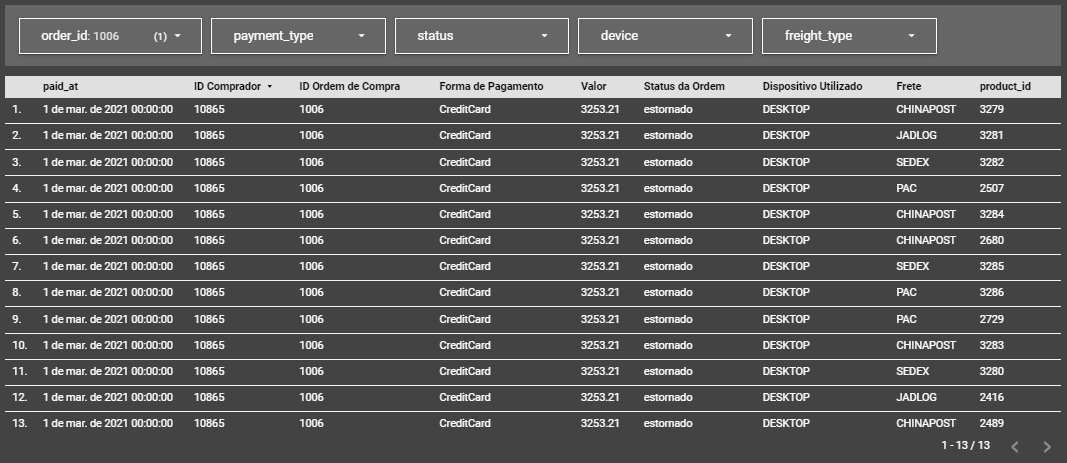

Passo então a realizar uma análise gráfica via Datastudio para compreender melhor os dados e posivelmente tirar algum insight.

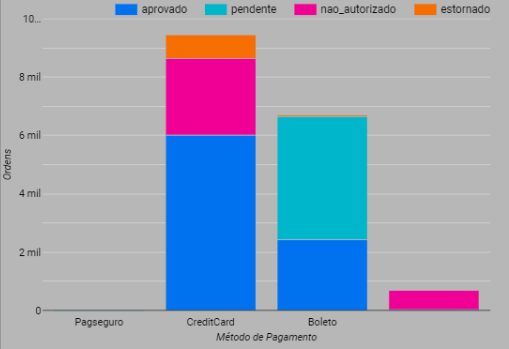

Deste gráfico podemos tirar informações importantes.

- A maioria das ordens feitas por cartão de crédito são aprovadas, ao mesmo tempo que é a forma em que mais ocorre estorno/reembolso de valores.
- Por boleto, apesar de não haver um grande número de ordens aprovadas em comparação com ordens pendentes, este segundo status é compreensivel para essa forma de pagamento visto que há um período de compensação bancária, então a ordem pode ter sido paga e ainda não reconhecida.
- Todos os pagamentos aos quais não identicamos a forma de pagamento não foram autorizados.

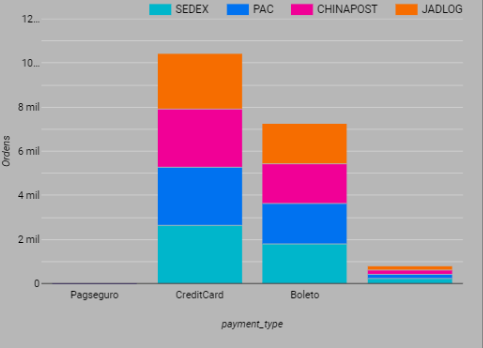

- Não parece haver diferenças significativas entre os fretes escolhidos. O que pode indicar a escolha de fornecedores deste serviços baseado em características bastante semelhantes entre eles.

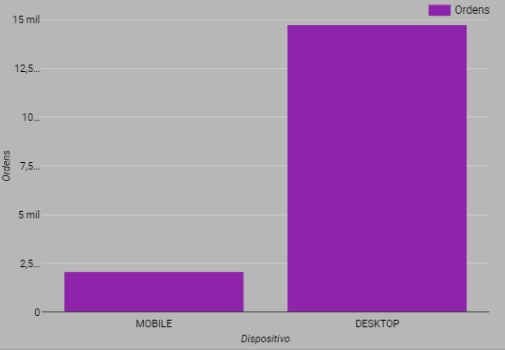

- A grande maioria das ordens é realizada via desktop ao invés de mobile, o que pode indicar que o público desta empresa é mais conservador, pois pesquisas mostram que no geral, brasileiros usam mais smartphones(mobile) para fazer compras ([referência](https://cndl.org.br/varejosa/87-dos-brasileiros-usam-o-smartphone-para-fazer-compras-pela-internet/)).
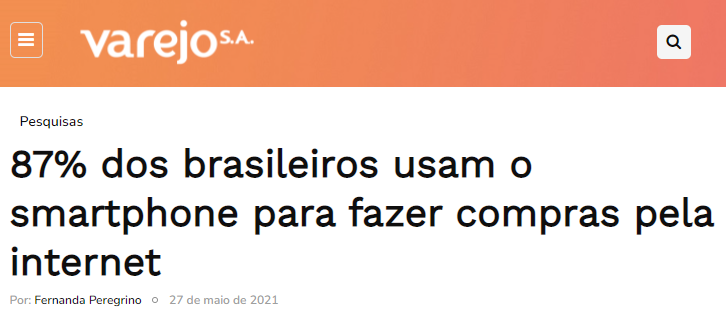


# **Tabela:** Products

In [26]:
# Buscando e apresentando o segundo dataframe a ser trabalhado.
products = pd.read_csv('/content/product.csv')
products

,id,name,height,weight,length,width,category
0,250.0,PRODUTO 250,1200.0,0.25,1600.0,2000.0,cosmetico
1,251.0,PRODUTO 251,7.0,0.50,49.0,30.0,movel
2,252.0,PRODUTO 252,12.0,0.50,18.0,34.0,eletronico
3,253.0,PRODUTO 253,13.0,0.13,35.0,13.0,eletronico
4,254.0,PRODUTO 254,30.0,0.63,48.0,7.0,eletronico
...,...,...,...,...,...,...,...
3656,3906.0,PRODUTO 3906,0.0,0.00,0.0,0.0,infoproduto
3657,3907.0,PRODUTO 3907,0.0,0.00,0.0,0.0,vestuario
3658,3908.0,PRODUTO 3908,0.0,0.00,0.0,0.0,eletronico
3659,3909.0,PRODUTO 3909,0.0,0.00,0.0,0.0,cosmetico


In [27]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3661 entries, 0 to 3660
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        3661 non-null   float64
 1   name      3661 non-null   object 
 2   height    3661 non-null   float64
 3   weight    3661 non-null   float64
 4   length    3661 non-null   float64
 5   width     3661 non-null   float64
 6   category  3661 non-null   object 
dtypes: float64(5), object(2)
memory usage: 200.3+ KB


In [28]:
products.describe()

,id,height,weight,length,width
count,3661.000000,3661.000000,3661.000000,3661.000000,3661.000000
mean,2080.000000,338.947766,2.453562,369.421964,363.788744
std,1056.983995,16743.711912,66.689717,16998.152147,16969.327601
min,250.000000,0.000000,0.000000,0.000000,0.000000
25%,1165.000000,0.000000,0.000000,0.000000,0.000000
50%,2080.000000,0.000000,0.000000,0.000000,0.000000
75%,2995.000000,0.000000,0.000000,0.000000,0.000000
max,3910.000000,999999.990000,3500.000000,999999.990000,999999.990000


Observações e Suposições:
- Considerando o menor número de colunas desta tabela e o fato de a tabela base ter uma coluna "product_id" enquanto esta tabela trata de produtos, acredito que não faça sentido analisar os dados de produtos individualmente e sim a partir de uma união com os dados da tabela anterior.

In [29]:
products.rename(columns={'id': 'product_id'}, inplace = True)
products['product_id'] = products['product_id'].astype(int)
products.head()

# Unindo os dois dataframes a partir do indice do produto.
unif = pd.merge(base, products, on='product_id')
unif.head()

,order_id,value,status,freight_type,freight_value,payment_type,paid_at,refunded_at,device,product_id,name,height,weight,length,width,category
0,1001,156.99,aprovado,CHINAPOST,12.71,Boleto,2021-03-02 08:39:09,NaN,DESKTOP,2386,PRODUTO 2386,0.0,0.0,0.0,0.0,cosmetico
1,1157,156.99,aprovado,JADLOG,12.71,Boleto,2021-03-02 08:39:16,NaN,DESKTOP,2386,PRODUTO 2386,0.0,0.0,0.0,0.0,cosmetico
2,1223,156.99,aprovado,PAC,0.00,CreditCard,2021-03-01 00:25:05,NaN,DESKTOP,2386,PRODUTO 2386,0.0,0.0,0.0,0.0,cosmetico
3,1273,168.00,aprovado,PAC,0.00,CreditCard,2021-03-01 00:31:17,NaN,DESKTOP,2386,PRODUTO 2386,0.0,0.0,0.0,0.0,cosmetico
4,1373,156.99,aprovado,PAC,0.00,CreditCard,2021-03-01 00:54:46,NaN,DESKTOP,2386,PRODUTO 2386,0.0,0.0,0.0,0.0,cosmetico


Devido a limitação de tempo, preferi produzir os gráficos via Datastudio para que fiquem mais apresentáveis no tempo que tenho disponível para fazer a análise.

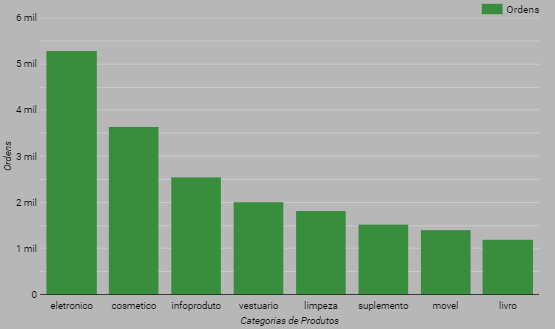